# 岭回归（Ridge Regression）

In [20]:
import numpy as np
import matplotlib.pyplot as plt


## 生成虚拟数据

$$y = 5x₁ + 2x₂² + 9x₃ + 6$$

In [21]:
def generate_data(num_samples = 1000, noise_level = 0.5):
    
    np.random.seed(42)

    x1 = np.random.randn(num_samples)
    x2 = np.random.randn(num_samples)
    x3 = np.random.randn(num_samples)

    y = 5 * x1 + 2 * x2 ** 2 + 9 * x3 + 6

    y += noise_level * np.random.randn(num_samples)

    X = np.column_stack((x1, x2 ** 2, x3))  # 矩阵，列向量

    return X, y
    

In [22]:
X, y = generate_data()


In [23]:
def ridge_regression_gd(X, y, alpha = 0.01, lambda_ = 0.1, n_iters = 1000):

    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    theta = np.random.randn(X_b.shape[1])   # 初始化参数

    loss_history = []
    theta_history = [theta.copy()]

    m = len(y)

    for _ in range(n_iters):

        y_pred = X_b.dot(theta)

        loss = (1 / (2 * m)) * np.sum((y_pred - y) ** 2) + (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
        loss_history.append(loss)

        gradients = (1 / m) * X_b.T.dot(y_pred - y)
        gradients[1:] += (lambda_ / m) * theta[1:]

        theta = theta - alpha * gradients
        theta_history.append(theta.copy())

    return theta, np.array(loss_history), np.array(theta_history)


In [24]:
final_theta, loss_history, theta_history = ridge_regression_gd(X, y, alpha = 0.01, lambda_ = 0.1, n_iters = 1000)


In [25]:
def evaluate_model(X, y, theta):
    
    X_b = np.c_[np.ones((X.shape[0], 1)), X]    # [c, x_1, x_2^2, x_3]

    y_pred = X_b.dot(theta)

    mse = np.mean((y_pred - y) ** 2)
    r2 = 1 - np.sum((y - y_pred) ** 2) / np.sum((y - np.mean(y)) ** 2)

    return mse, r2


In [26]:
mse, r2 = evaluate_model(X, y, final_theta)


In [33]:
def plot_results(loss_history, theta_history):
    
    plt.figure(figsize = (15, 10))

    plt.subplot(2, 1, 1)
    plt.plot(loss_history, linewidth = 2, color = "b")
    plt.title("Loss History", fontsize = 20, fontweight = "bold", fontfamily = "sans-serif")
    plt.ylabel("Loss", fontsize = 15, fontweight = "bold", fontfamily = "sans-serif")
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(theta_history[:, 0], label = "Constant Term", linewidth = 2, color = "b")
    plt.plot(theta_history[:, 1], label = "x1 Coefficient", linewidth = 2, color = "orange")
    plt.plot(theta_history[:, 2], label = "x2 Coefficient", linewidth = 2, color = "g")
    plt.plot(theta_history[:, 3], label = "x3 Coefficient", linewidth = 2, color = "r")
    plt.title("Parameters History", fontsize = 20, fontweight = "bold", fontfamily = "sans-serif")
    plt.ylabel("Coefficients", fontsize = 15, fontweight = "bold", fontfamily = "sans-serif")
    plt.xlabel("Iterations", fontsize = 15, fontweight = "bold", fontfamily = "sans-serif")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


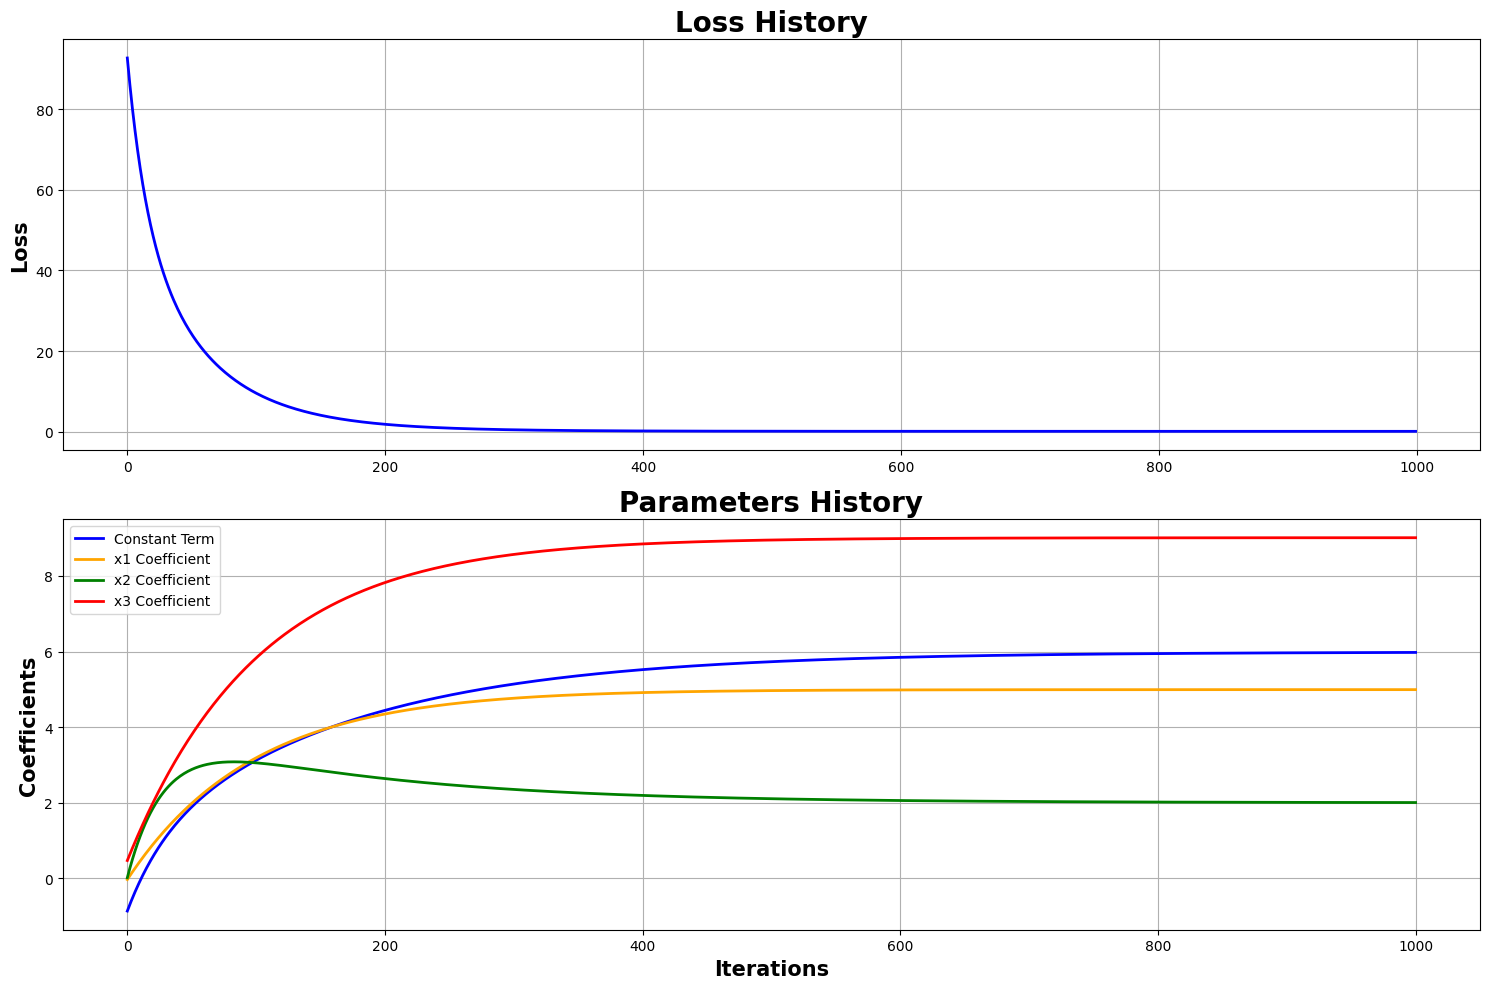

In [34]:
plot_results(loss_history, theta_history)


In [29]:
def plot_statements(final_theta, mse, r2):

    print(f"Model's final parameters:\n")
    
    print(f"Constant Term: {final_theta[0]:.4f}")
    print(f"x1 coefficient: {final_theta[1]:.4f}")
    print(f"x2^2 coefficient: {final_theta[2]:.4f}")
    print(f"x3 coefficient: {final_theta[3]:.4f}\n")

    print("-" * 50, "\n")

    print(f"Model's performance metrics:\n")

    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared (R2): {r2:.4f}\n")

    print("-" * 50, "\n")

    print(f"Model's fitted function: {final_theta[1]:.4f} * x1 + {final_theta[2]:.4f} * x2^2 + {final_theta[3]:.4f} * x3 + {final_theta[0]:.4f}")


In [30]:
plot_statements(final_theta, mse, r2)

Model's final parameters:

Constant Term: 5.9764
x1 coefficient: 4.9925
x2^2 coefficient: 2.0064
x3 coefficient: 9.0101

-------------------------------------------------- 

Model's performance metrics:

Mean Squared Error (MSE): 0.2634
R-squared (R2): 0.9977

-------------------------------------------------- 

Model's fitted function: 4.9925 * x1 + 2.0064 * x2^2 + 9.0101 * x3 + 5.9764
